# Exploratory Data Analysis

In [41]:
# 多plot, 尝试一些奇怪的东西, 看看会不会有新发现

# 好多都需要换一下数据来源，因为是别的notebook复制来的，plot之前留意一下吧
# 写的时候记得title和label，可以用vscode 左边的outline看在哪，因为最后要交这个notebook，
# 所以公证一些是好的

## Preparation

### Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns


### Import data and conduct necessary checks

In [80]:
# load preprocessed and normalised data 
df_review = pd.read_csv("review.csv")
df_product = pd.read_csv("product.csv")
df_camera_norm = pd.read_csv("review_camera_normalised.csv") 
# df_phone_norm = pd.read_csv("review_phone_normalised.csv")
# df_computer_norm = pd.read_csv("review_computer_normalised.csv")
# use camera to write code, we might change other product category

/var/folders/p7/48zcqw_x76n0z83csbz7s4580000gn/T/ipykernel_89806/3536417830.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv("review.csv")
/var/folders/p7/48zcqw_x76n0z83csbz7s4580000gn/T/ipykernel_89806/3536417830.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_camera_norm = pd.read_csv("review_camera_normalised.csv")


## All review dataset EDA

In [11]:
df_review.head()    

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
0,5.0,True,2002-07-17,0060009810,This was the first time I read Garcia-Aguilera...,NaN,False,2002,11.49,Books
1,5.0,False,2002-07-06,0060009810,"As with all of Ms. Garcia-Aguilera's books, I ...",NaN,False,2002,11.49,Books
2,5.0,False,2002-07-03,0060009810,I've not read any of Ms Aguilera's works befor...,2,False,2002,11.49,Books
3,4.0,False,2002-06-30,0060009810,This romance novel is right up there with the ...,3,False,2002,11.49,Books
4,5.0,False,2002-06-28,0060009810,Carolina Garcia Aguilera has done it again. S...,NaN,False,2002,11.49,Books


### 1. Distribution of Ratings

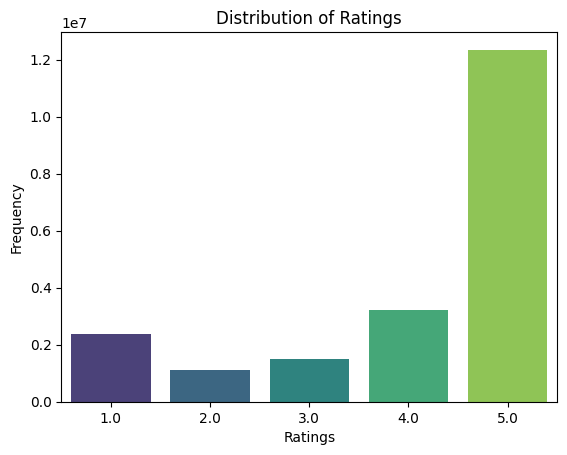

In [35]:
sns.countplot(x='overall', data=df_review, palette='viridis')

plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

plt.show()

### 2. Distribution of number of reviews over time

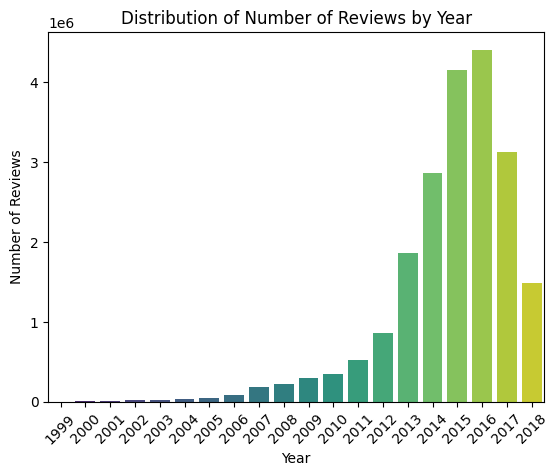

In [10]:
# Filter out the years 1997 and 1998
df_review_filtered = df_review[~df_review['Year'].isin([1997, 1998])]

# Now plot the data
sns.countplot(x='Year', data=df_review_filtered, palette='viridis')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Number of Reviews by Year')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()


### 3. Verified vs. Unverified Reviews

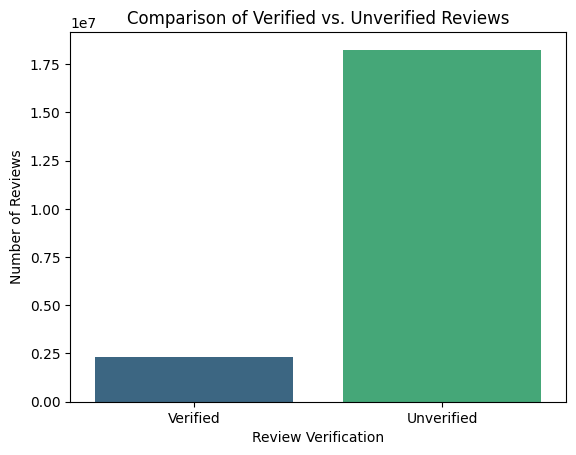

In [51]:
# Count the number of verified and unverified reviews
verified_counts = df_review['verified'].value_counts()

# Create a bar chart
sns.barplot(x=verified_counts.index, y=verified_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('Review Verification')
plt.ylabel('Number of Reviews')
plt.title('Comparison of Verified vs. Unverified Reviews')
plt.xticks([0, 1], ['Verified', 'Unverified'])  # Set custom labels for the x-axis ticks

# Show the plot
plt.show()

### 4. Correlation of Price and Number of ratings

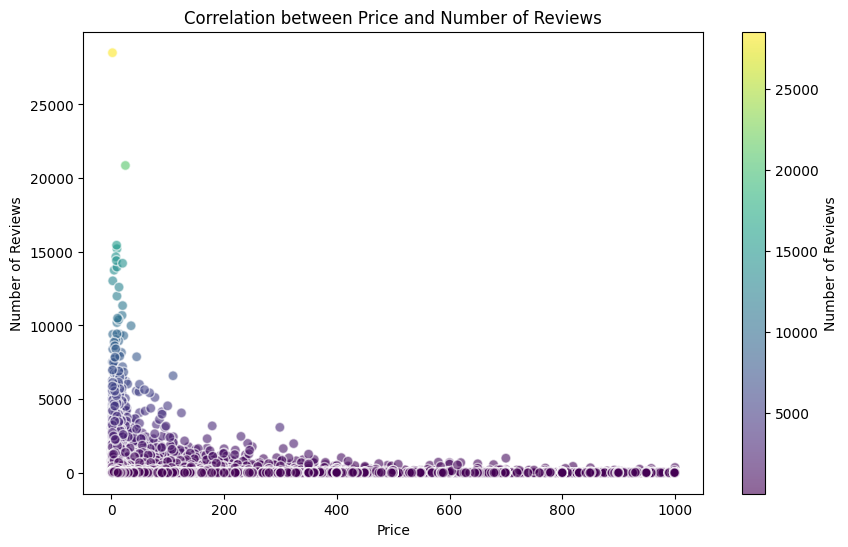

In [40]:
# Group the data by 'asin' and 'price', then count the number of reviews for each group
review_counts_by_price = df_review.groupby(['asin', 'price']).size().reset_index(name='review_count')

plt.figure(figsize=(10,6))
plt.scatter(review_counts_by_price['price'], review_counts_by_price['review_count'], 
            c=review_counts_by_price['review_count'], cmap='viridis', alpha=0.6, edgecolors='w', s=50)  

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Correlation between Price and Number of Reviews')

# Add a colorbar to show the scale of 'review_count'
plt.colorbar(label='Number of Reviews')

# Show the plot
plt.show()

### 5. Correlation between the review text length and ratings

In [ ]:
# create a new column 'review_length' to store the length of each review
df_review['review_length'] = df_review['reviewText'].apply(len)

# drop the outliers
df_review_len = df_review[df_review['review_length'] < 1500]

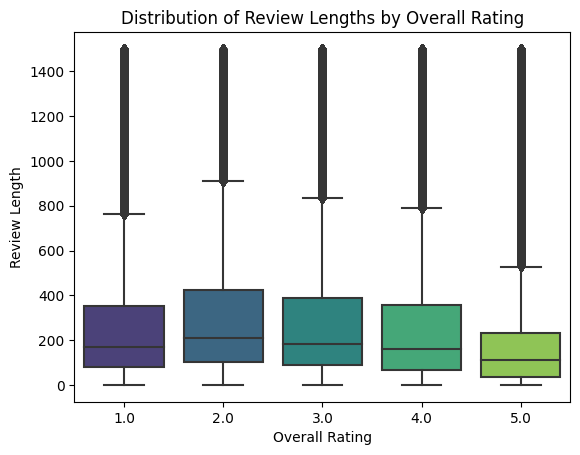

In [33]:
# Use seaborn to create a box plot
sns.boxplot(x='overall', y='review_length', data=df_review_len, palette='viridis')

# Set the labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Review Length')
plt.title('Distribution of Review Lengths by Overall Rating')

# Show the plot
plt.show()


### 6. Top 10 categories by average price

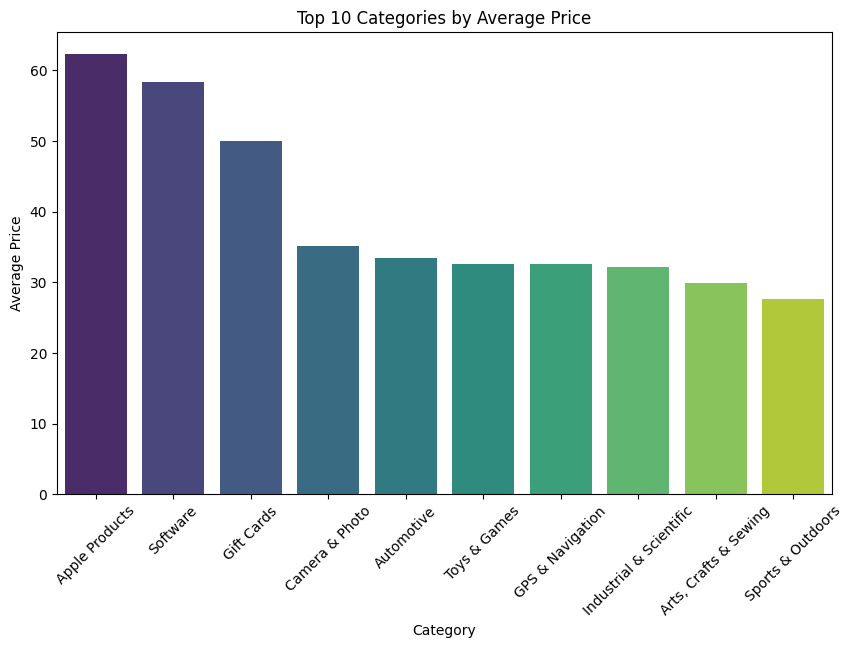

In [39]:
# Calculate the mean price for categories with more than 10 rows
filtered_average_price = df_review.groupby('main_cat').filter(lambda x: len(x) > 10)
average_price = filtered_average_price.groupby('main_cat')['price'].mean().sort_values(ascending=False)

# Show only the top 10 categories
average_price_top10 = average_price.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=average_price_top10.index, y=average_price_top10.values, palette='viridis')

# Set the labels and title
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Top 10 Categories by Average Price')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



### 7. Top 10 categories by number of reviews

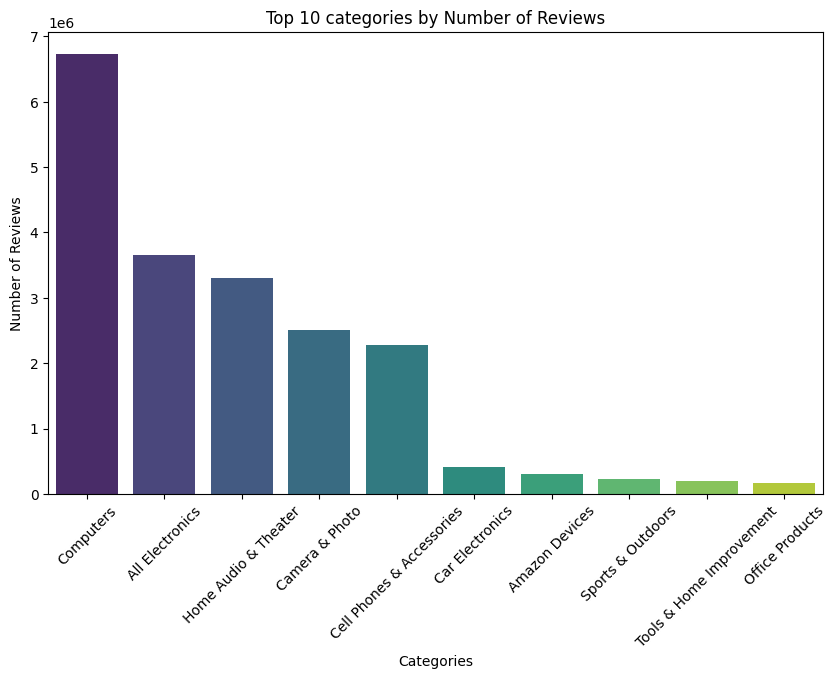

In [38]:

# Get the counts of each main_cat
main_cat_counts = df_review['main_cat'].value_counts()

# Select the top 10 main_cat and sort them by count in descending order
top_10_main_cat = main_cat_counts.head(10).sort_values(ascending=False)

# Plot the distribution of the top 10 main_cat with rotated x-labels
plt.figure(figsize=(10,6))
sns.countplot(x='main_cat', data=df_review[df_review['main_cat'].isin(top_10_main_cat.index)], palette='viridis', order=top_10_main_cat.index)
plt.title('Top 10 categories by Number of Reviews')
plt.xlabel('Categories') 
plt.ylabel('Number of Reviews') 
plt.xticks(rotation=45) 
plt.show()



### 8. Average Rating by Year

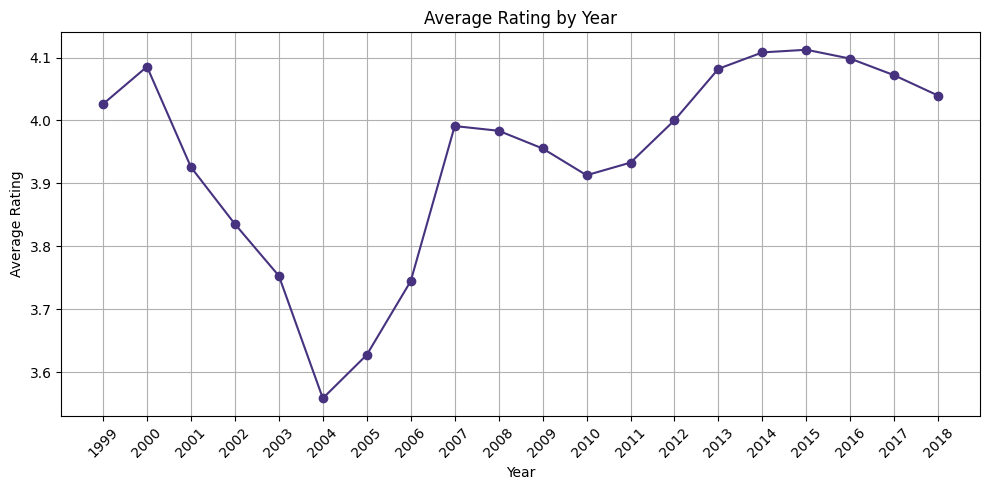

In [27]:
df_avg_rating = df_review.groupby('Year')['overall'].mean()
df_avg_rating.drop([1997, 1998], inplace=True)
plt.figure(figsize=(10, 5))  # Optional: Adjusts the size of the figure
plt.plot(df_avg_rating.index.astype(int), df_avg_rating, marker='o', color=sns.color_palette('viridis')[0])  # Ensure index is integer
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.xticks(df_avg_rating.index.astype(int), rotation=45)  # Ensure x-ticks are integer years and rotate for better visibility

plt.grid(True)  
plt.tight_layout() 
plt.show()


### 9. Distribution of Ratings Over Time

In [48]:
# create a new df without 1997 and 1998
df_review_filtered = df_review[~df_review['Year'].isin([1997, 1998])]

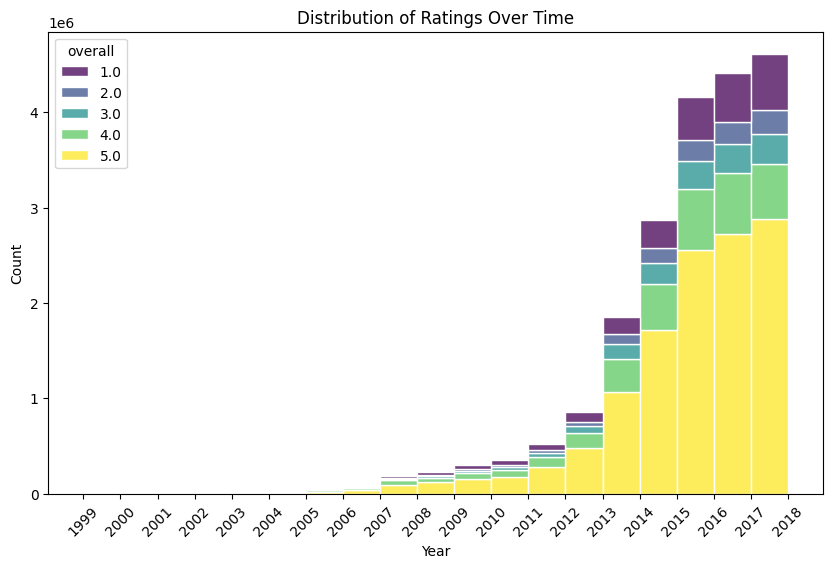

In [51]:
plt.figure(figsize=(10, 6))  
sns.histplot(
    data=df_review_filtered,
    x="Year",
    hue="overall",
    bins=19,
    palette="viridis",
    edgecolor="white",
    multiple="stack",
)
plt.title("Distribution of Ratings Over Time")

# Adjust the x-axis ticks to display only integer years
plt.xticks(np.arange(min(df_review_filtered['Year']), max(df_review_filtered['Year'])+1, 1), rotation=45)
plt.xlabel('Year')

plt.show()


## Camera Review Dataset EDA

In [41]:
df_camera_norm.head()

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
0,5.0,True,2010-05-15,5135000011,skeptical buy generic replacement battery new ...,4,False,2010,NaN,Camera & Photo
1,5.0,True,2010-02-03,5135000011,battery arrive ahead schedule price anyplace b...,4,False,2010,NaN,Camera & Photo
2,5.0,True,2009-05-16,5135000011,muy importante tener una batera cargada de rep...,2,False,2009,NaN,Camera & Photo
3,5.0,True,2014-05-16,5135000011,rechargeable battery pack order work great cam...,NaN,False,2014,NaN,Camera & Photo
4,5.0,True,2014-04-07,5135000011,battery charge quickly instal camera easily gr...,NaN,False,2014,NaN,Camera & Photo


In [50]:
# create a df without 1998
df_camera_filtered = df_camera_norm[~df_camera_norm['Year'].isin([1998])]


### 1. Overall Rating Distribution

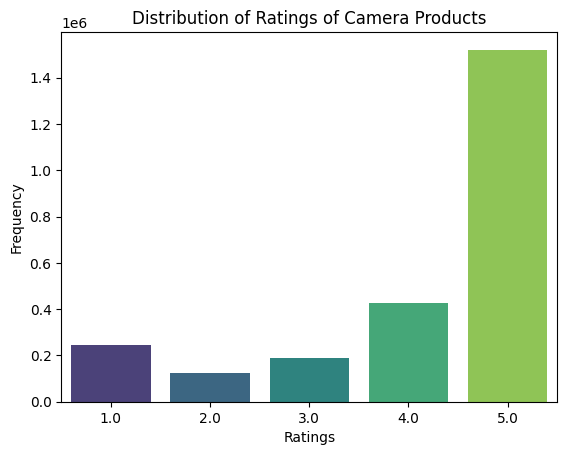

In [45]:
sns.countplot(x='overall', data=df_camera_norm, palette='viridis')

plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings of Camera Products')

plt.show()


### 2. Distribution of Ratings Over Time

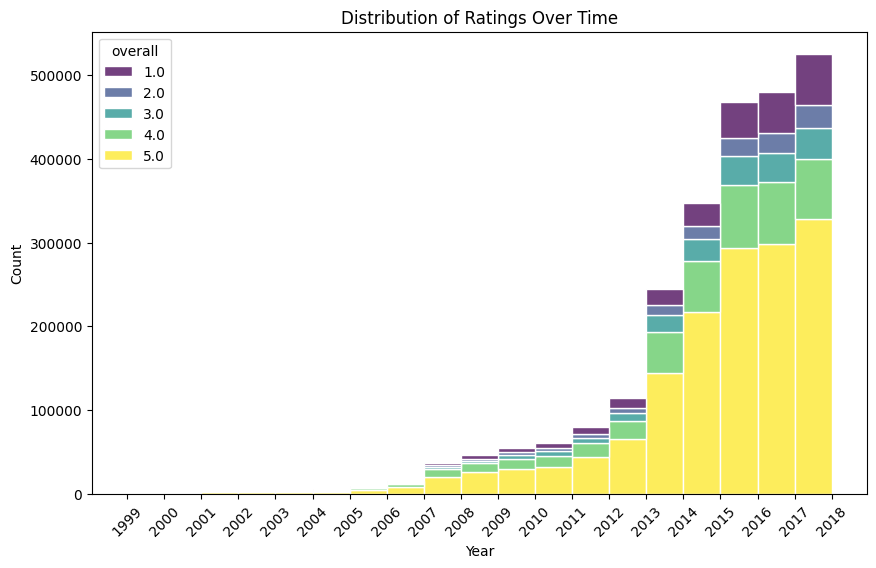

In [52]:
plt.figure(figsize=(10, 6))  
sns.histplot(
    data=df_camera_filtered,
    x="Year",
    hue="overall",
    bins=19,
    palette="viridis",
    edgecolor="white",
    multiple="stack",
)
plt.title("Distribution of Ratings Over Time")

# Adjust the x-axis ticks to display only integer years
plt.xticks(np.arange(min(df_camera_filtered['Year']), max(df_camera_filtered['Year'])+1, 1), rotation=45)
plt.xlabel('Year')

plt.show()

### 3. Average Rating by year

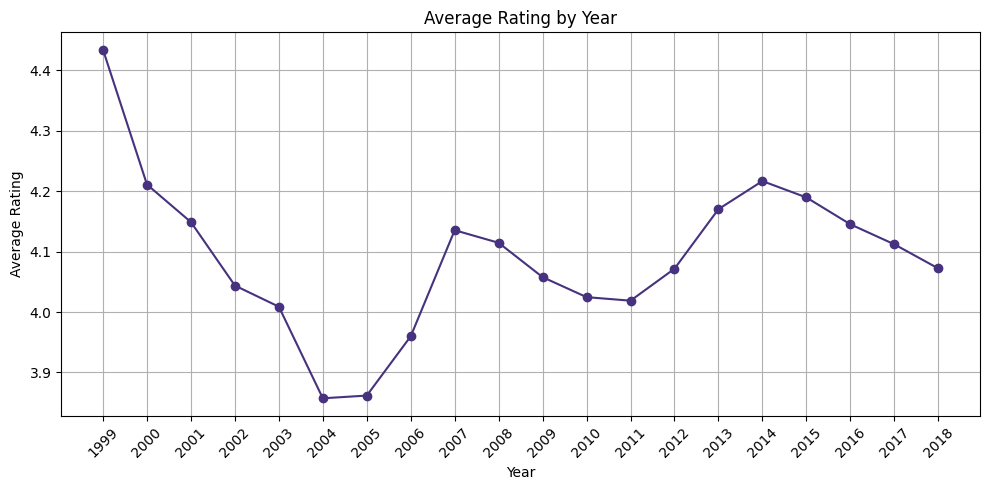

In [54]:
df_avg_rating_camera = df_camera_filtered.groupby('Year')['overall'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_avg_rating_camera.index.astype(int), df_avg_rating_camera, marker='o', color=sns.color_palette('viridis')[0]) 
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.xticks(df_avg_rating_camera.index.astype(int), rotation=45) 

plt.grid(True)  
plt.tight_layout() 
plt.show()

### 4. Average Review length by Year

In [71]:
# check the type of reviewText
type(df_camera_norm['reviewText'][0])
# convert all reviewText to string
df_camera_norm['reviewText'] = df_camera_norm['reviewText'].astype(str)
# start from year 1999
df_camera_filtered_len = df_camera_norm[~df_camera_norm['Year'].isin([1998])]

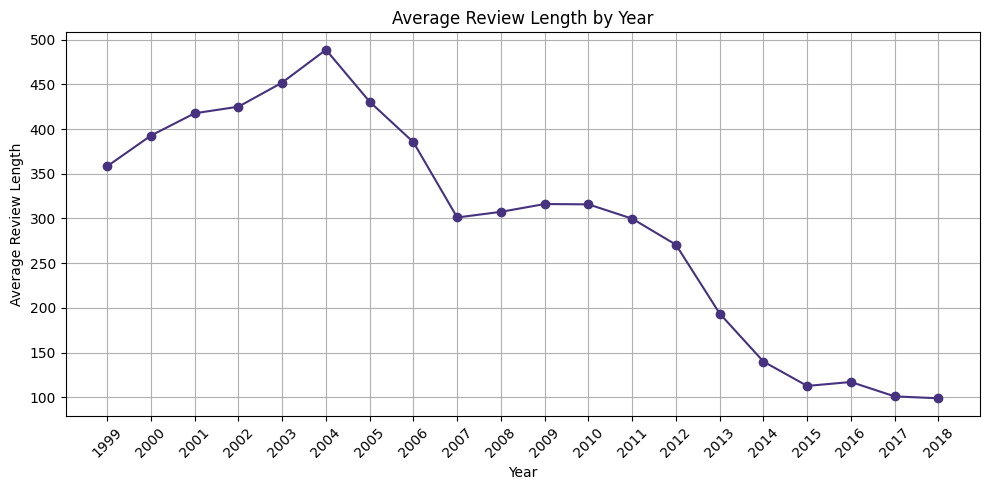

In [73]:
df_avg_review_length = df_camera_filtered_len.groupby('Year')['review_length'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_avg_review_length.index.astype(int), df_avg_review_length, marker='o', color=sns.color_palette('viridis')[0]) 
plt.xlabel('Year')
plt.ylabel('Average Review Length')
plt.title('Average Review Length by Year')
plt.xticks(df_avg_review_length.index.astype(int), rotation=45) 

plt.grid(True)  
plt.tight_layout() 
plt.show()


### 5. Correlation between the review text length and ratings

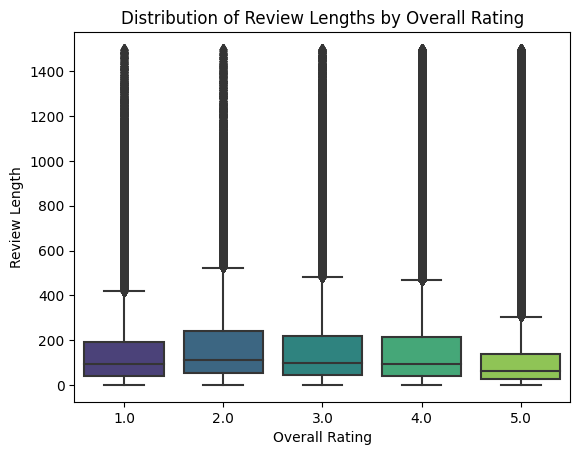

In [76]:
# Create a new column 'review_length' to store the length of each review
df_camera_norm['review_length'] = df_camera_norm['reviewText'].apply(len)

# Drop the outliers
df_camera_len = df_camera_norm[df_camera_norm['review_length'] < 1500]

# Use seaborn to create a box plot
sns.boxplot(x='overall', y='review_length', data=df_camera_len, palette='viridis')

# Set the labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Review Length')
plt.title('Distribution of Review Lengths by Overall Rating')

# Show the plot
plt.show()


### 6. Correlation between rating and vote

In [81]:
# create a new column is_voted, if the vote is NaN, then is_voted is 0, otherwise 1
df_camera_norm['is_voted'] = df_camera_norm['vote'].apply(lambda x: 0 if pd.isna(x) else 1)
df_camera_norm.head()   


,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat,is_voted
0,5.0,True,2010-05-15,5135000011,skeptical buy generic replacement battery new ...,4,False,2010,NaN,Camera & Photo,1
1,5.0,True,2010-02-03,5135000011,battery arrive ahead schedule price anyplace b...,4,False,2010,NaN,Camera & Photo,1
2,5.0,True,2009-05-16,5135000011,muy importante tener una batera cargada de rep...,2,False,2009,NaN,Camera & Photo,1
3,5.0,True,2014-05-16,5135000011,rechargeable battery pack order work great cam...,NaN,False,2014,NaN,Camera & Photo,0
4,5.0,True,2014-04-07,5135000011,battery charge quickly instal camera easily gr...,NaN,False,2014,NaN,Camera & Photo,0


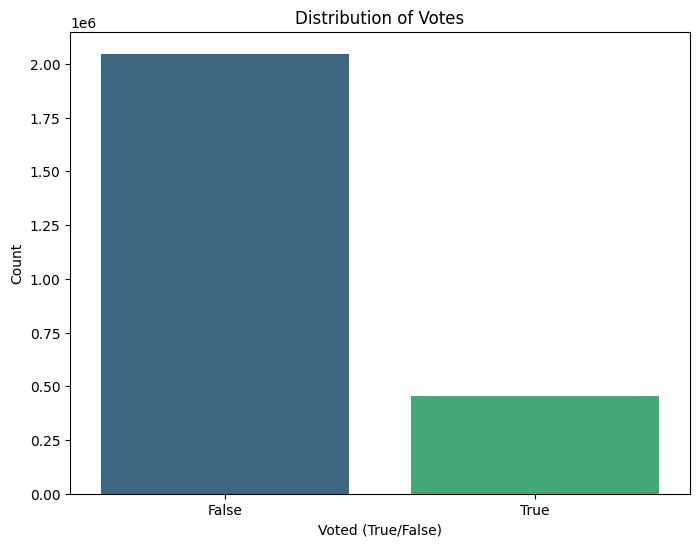

In [90]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_voted', data=df_camera_norm, palette='viridis')
plt.title('Distribution of Votes')
plt.xlabel('Voted (True/False)')
plt.ylabel('Count')

plt.xticks(ticks=[0, 1], labels=['False', 'True'])

plt.show()


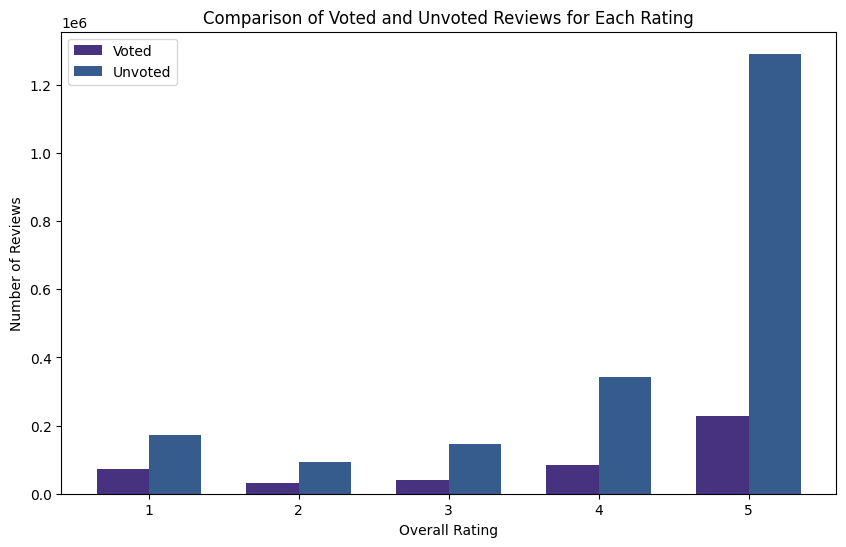

In [94]:

voted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == True].groupby('overall')['is_voted'].count()
unvoted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == False].groupby('overall')['is_voted'].count()

# Plot the number of voted and unvoted reviews for each rating
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = voted_reviews_count.index
plt.bar(index - bar_width/2, voted_reviews_count.values, bar_width, label='Voted', color=sns.color_palette('viridis')[0])
plt.bar(index + bar_width/2, unvoted_reviews_count.values, bar_width, label='Unvoted', color=sns.color_palette('viridis')[1])

# Set labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.title('Comparison of Voted and Unvoted Reviews for Each Rating')
plt.xticks(index)
plt.legend()

plt.show()



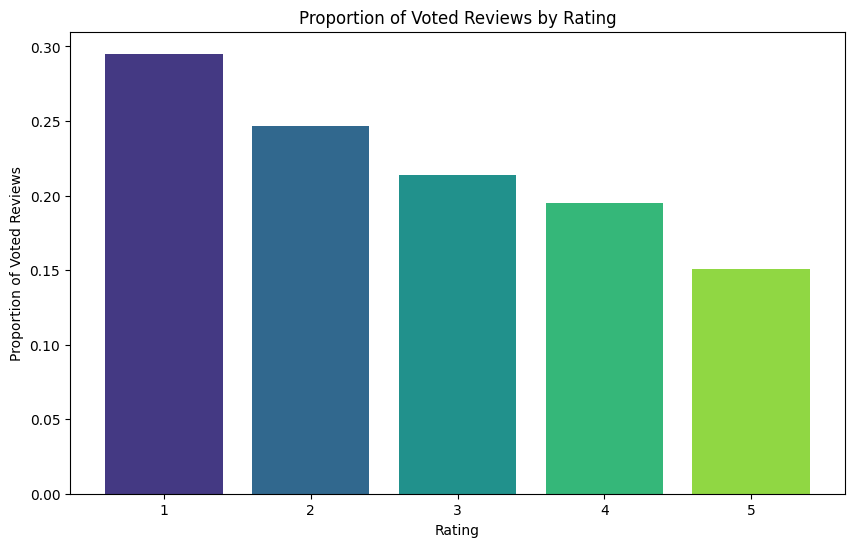

In [88]:
df_camera_norm['is_voted'] = df_camera_norm['vote'].notnull()

# Calculate the count of voted and unvoted reviews per rating
voted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == True].groupby('overall')['is_voted'].count()
unvoted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == False].groupby('overall')['is_voted'].count()

# Handle potential division by zero by adding a small number (e.g., 1e-10) to the denominator
voted_proportion = voted_reviews_count / (voted_reviews_count + unvoted_reviews_count + 1e-10)

# Plot the proportion of voted reviews for each rating
plt.figure(figsize=(10, 6))
plt.bar(voted_proportion.index, voted_proportion.values, color=sns.color_palette('viridis', len(voted_proportion)))
plt.title('Proportion of Voted Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion of Voted Reviews')
plt.show()



In [24]:
# check the type of vote
type(df_camera_norm['vote'][0])
# convert all vote to int, convert NaN to 0
df_camera_norm['vote'] = df_camera_norm['vote'].fillna(0)
df_camera_norm['vote'] = df_camera_norm['vote'].astype(int)

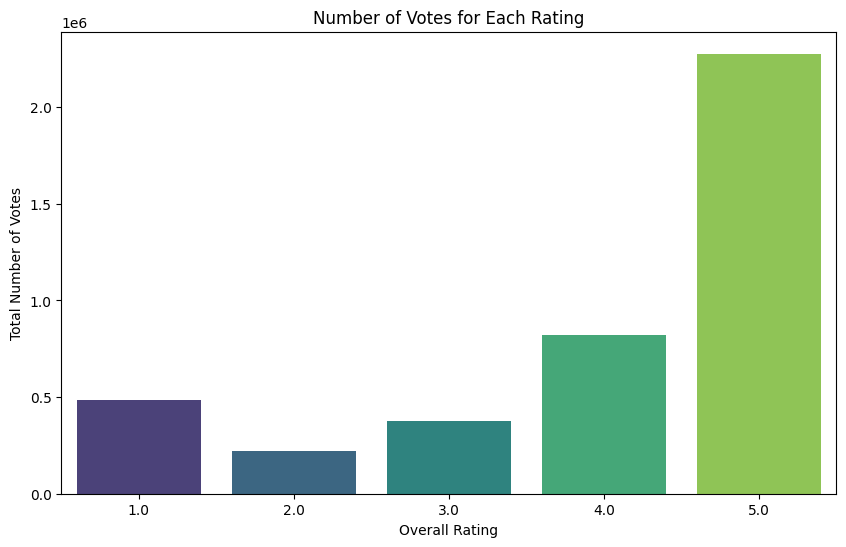

In [28]:
# Group the data by 'overall' rating and sum the number of votes for each rating
votes_by_rating = df_camera_norm.groupby('overall')['vote'].sum()

# Plot the number of votes for each rating
plt.figure(figsize=(10, 6))
sns.barplot(x=votes_by_rating.index, y=votes_by_rating.values, palette='viridis')
plt.title('Number of Votes for Each Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Total Number of Votes')

plt.show()


### 7. Correlation between image and vote

In [ ]:
# 是否有图片和vote的关系（下面有可以直接复制的代码）

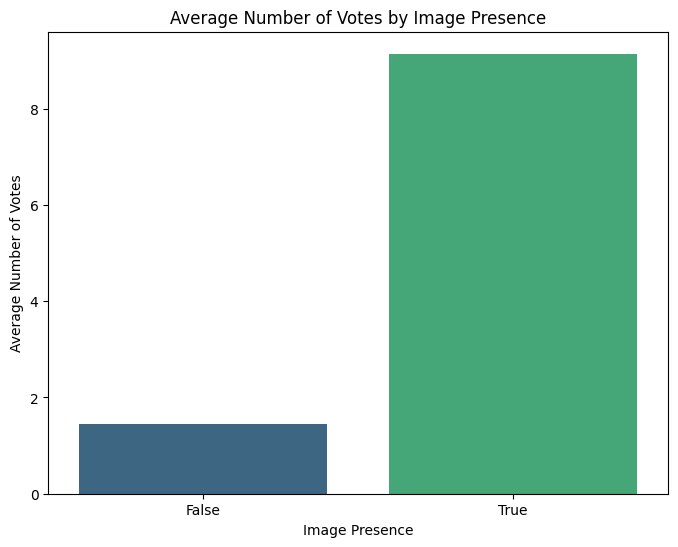

In [30]:
# Group the data by 'image' column and calculate the average number of votes for each group
average_votes_by_image = df_camera_norm.groupby('image')['vote'].mean()

# Plot the average number of votes for reviews with and without images
plt.figure(figsize=(8, 6))
sns.barplot(x=average_votes_by_image.index, y=average_votes_by_image.values, palette='viridis')
plt.title('Average Number of Votes by Image Presence')
plt.xlabel('Image Presence')
plt.ylabel('Average Number of Votes')
plt.show()


### 8. Correlation between review text length and vote

In [36]:
# convert the 'reviewText' column to string
df_camera_norm['reviewText'] = df_camera_norm['reviewText'].astype(str)

# create a new column 'review_length' to store the length of each review
df_camera_norm['review_length'] = df_camera_norm['reviewText'].apply(len)

# drop the outliers
df_camera_len = df_camera_norm[df_camera_norm['review_length'] < 1500]

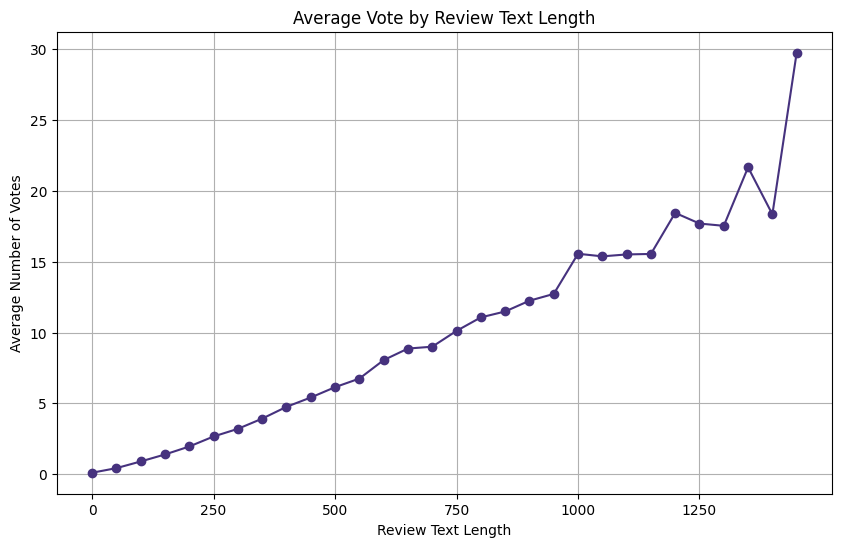

In [89]:

bins = np.arange(0, df_camera_len['review_length'].max() + 50, 50)

average_vote_by_length = df_camera_len.groupby(pd.cut(df_camera_len['review_length'], bins=bins))['vote'].mean()

plt.figure(figsize=(10, 6))
average_vote_by_length.plot(marker='o', color=sns.color_palette('viridis')[0])  
plt.title('Average Vote by Review Text Length')
plt.xlabel('Review Text Length')
plt.ylabel('Average Number of Votes')
plt.grid(True)

plt.xticks(range(0, len(average_vote_by_length), 5), bins[:-1:5])

plt.show()


### 9. Proportion of Reviews with Images by Rating

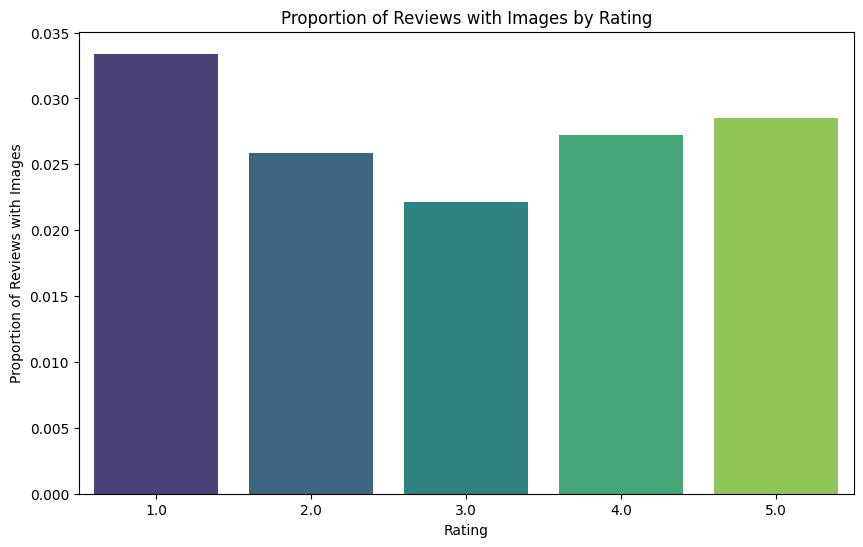

In [63]:
# Group the dataset by 'overall' rating and aggregate the 'image' column to find the sum (number of images) and size (total reviews) for each rating group
grouped = df_camera_norm.groupby('overall')['image'].agg(['sum', 'size'])
grouped['image_ratio'] = grouped['sum'] / grouped['size']

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped['image_ratio'], palette='viridis')
plt.title('Proportion of Reviews with Images by Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion of Reviews with Images')
plt.show()


## Product dataset EDA

In [11]:
df_product.head()

,description,title,brand,rank,main_cat,date,price,asin
0,the following camera brands and models have be...,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision,"['>#3,092 in Tools &amp; Home Improvement &gt;...",Camera & Photo,"January 28, 2014",65.00,0011300000
1,this second edition of the handbook of astrono...,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.,"['>#55,933 in Camera &amp; Photo (See Top 100 ...",Camera & Photo,"June 17, 2003",NaN,0043396828
2,a zesty tale publishers weekly garcia aguilera...,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page,"3,105,177 in Books (",Books,NaN,11.49,0060009810
3,NaN,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page,"2,024,298 in Books (",Books,NaN,NaN,0060219602
4,sex lies murder fame is brillllli f ing ant lo...,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page,"3,778,828 in Books (",Books,NaN,13.95,0060786817


In [12]:
# calculate the proportion of "Camera & Photo" products in all products
camera_proportion = df_product['main_cat'].value_counts(normalize=True)['Camera & Photo']
camera_proportion

0.16608505997818976

In [13]:
# select the top 10 brands in "Camera & Photo" category
top_10_brands = df_product[df_product['main_cat'] == 'Camera & Photo']['brand'].value_counts().head(10)
top_10_brands

brand
Canon        3637
Neewer       3217
Sony         2877
Nikon        2824
Panasonic    1317
Opteka       1300
Olympus      1292
Fujifilm     1205
Vivitar      1058
Kodak        1037
Name: count, dtype: int64

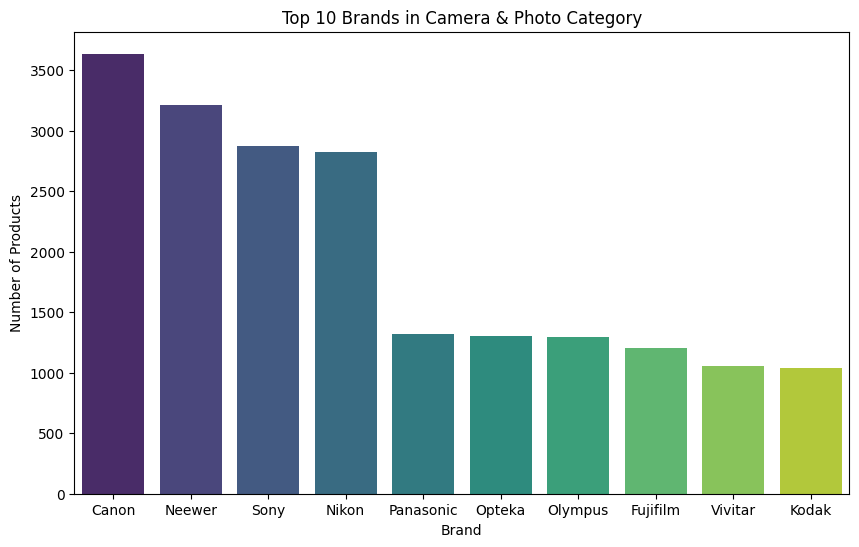

In [14]:
# plot the top 10 brands in "Camera & Photo" category
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')

plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Top 10 Brands in Camera & Photo Category')

plt.show()

# Others: 看着用，这是我之前乱搞的，说不定有些能讲出什么。用的话记得改颜色和变量名

review image and votes

In [ ]:
df_review_merged = pd.read_csv('df_review_merged.csv')
df_review_merged.info()

C:\Users\rzp98\AppData\Local\Temp\ipykernel_5760\3956128325.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review_merged = pd.read_csv('df_review_merged.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566364 entries, 0 to 20566363
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   overall     float64
 1   verified    bool   
 2   reviewTime  object 
 3   asin        object 
 4   reviewText  object 
 5   vote        object 
 6   image       bool   
 7   price       float64
 8   main_cat    object 
 9   Year        int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 1.3+ GB


In [ ]:

df_review_merged['vote'] = df_review_merged['vote'].str.replace(',', '').astype(float)


In [ ]:
df_review_merged['vote'].isna().sum()

0

In [ ]:
df_review_merged = df_review_merged.dropna(subset=['vote'])

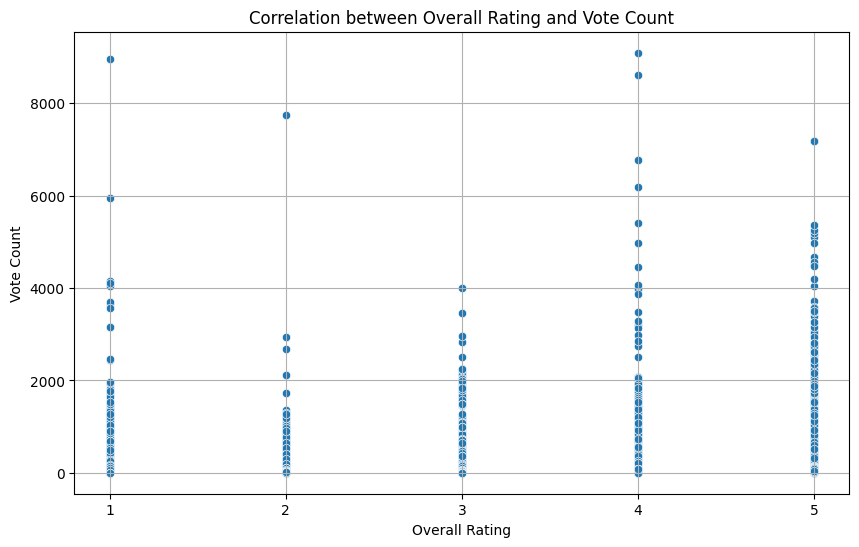

0.019782066960203546

In [ ]:
correlation = df_review_merged['overall'].corr(df_review_merged['vote'])

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.xticks([1, 2, 3, 4, 5])
sns.scatterplot(x='overall', y='vote', data=df_review_merged)
plt.title('Correlation between Overall Rating and Vote Count')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

correlation

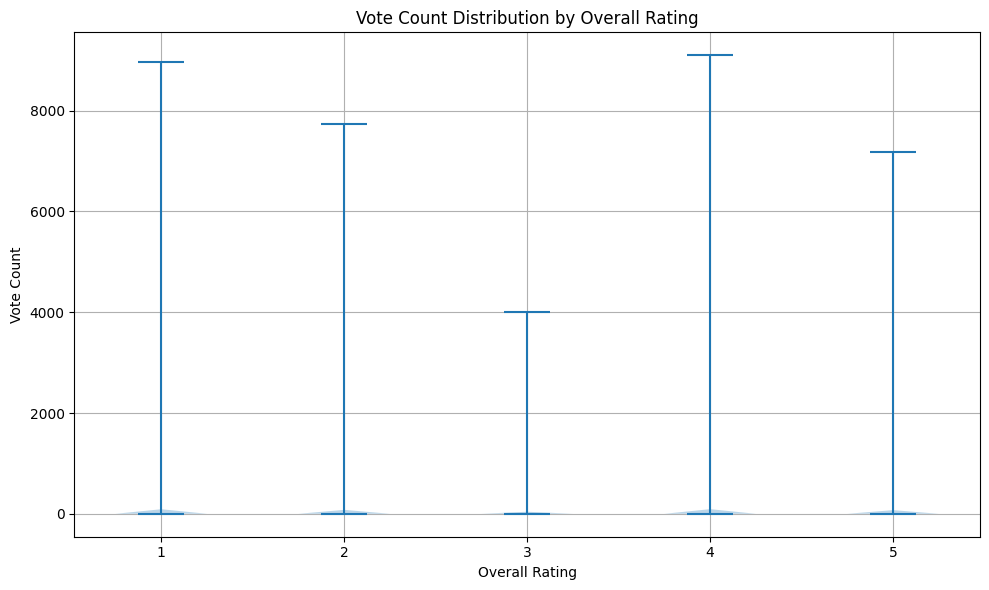

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
plt.violinplot([df_review_merged.loc[df_review_merged['overall'] == i, 'vote'] for i in range(1, 6)], positions=[1, 2, 3, 4, 5])
plt.title('Vote Count Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.tight_layout()

plt.show()


review image and votes

In [ ]:
df_review_merged = pd.read_csv('df_review_merged.csv')
df_review_merged.info()

C:\Users\rzp98\AppData\Local\Temp\ipykernel_5760\3956128325.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review_merged = pd.read_csv('df_review_merged.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566364 entries, 0 to 20566363
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   overall     float64
 1   verified    bool   
 2   reviewTime  object 
 3   asin        object 
 4   reviewText  object 
 5   vote        object 
 6   image       bool   
 7   price       float64
 8   main_cat    object 
 9   Year        int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 1.3+ GB


In [ ]:

df_review_merged['vote'] = df_review_merged['vote'].str.replace(',', '').astype(float)


In [ ]:
df_review_merged['vote'].isna().sum()

0

In [ ]:
df_review_merged = df_review_merged.dropna(subset=['vote'])

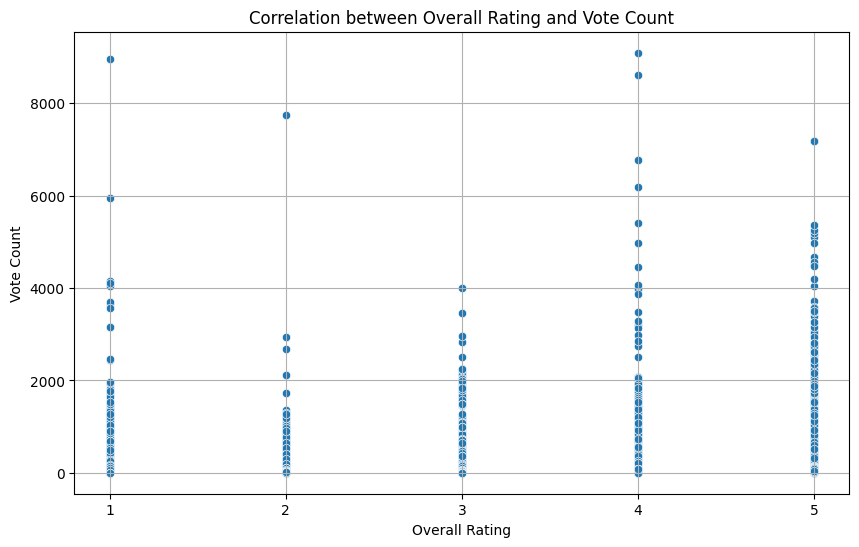

0.019782066960203546

In [ ]:
correlation = df_review_merged['overall'].corr(df_review_merged['vote'])

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.xticks([1, 2, 3, 4, 5])
sns.scatterplot(x='overall', y='vote', data=df_review_merged)
plt.title('Correlation between Overall Rating and Vote Count')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

correlation

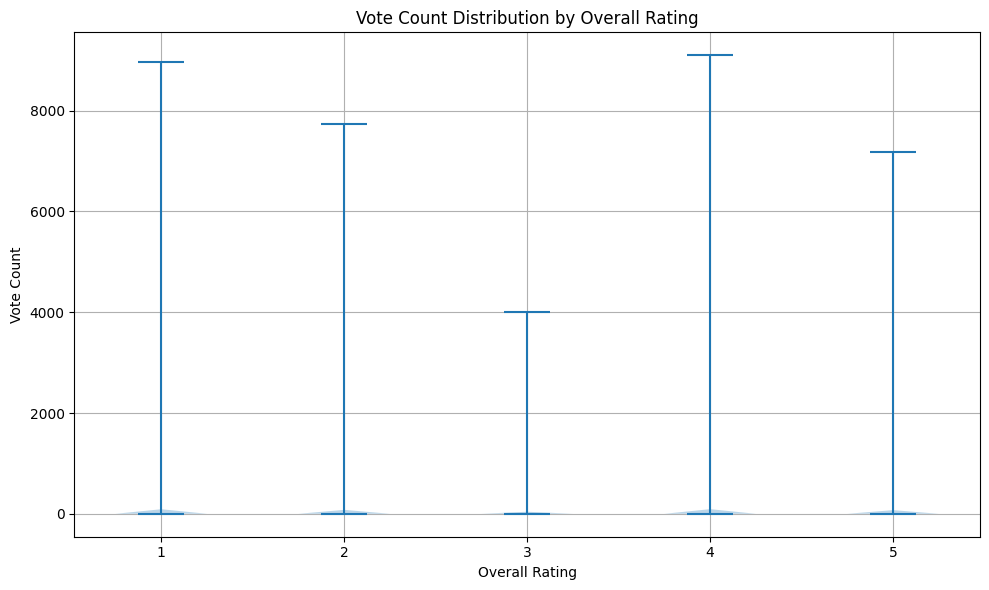

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
plt.violinplot([df_review_merged.loc[df_review_merged['overall'] == i, 'vote'] for i in range(1, 6)], positions=[1, 2, 3, 4, 5])
plt.title('Vote Count Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.tight_layout()

plt.show()


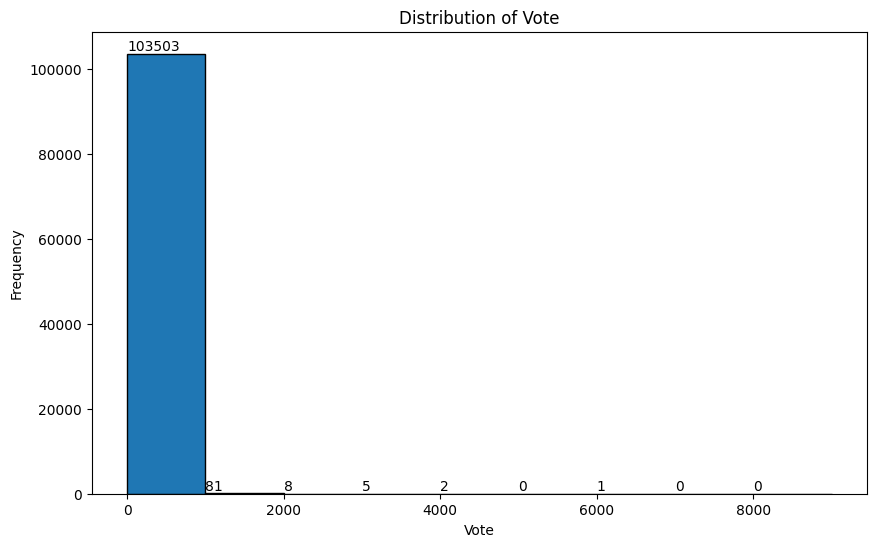

In [ ]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df_image_true['vote'],bins=range(1, 10000, 1000), edgecolor='black')

for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), rotation=0, va='bottom')

# Set the labels and title
plt.xlabel('Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Vote')

# Show the plot
plt.show()

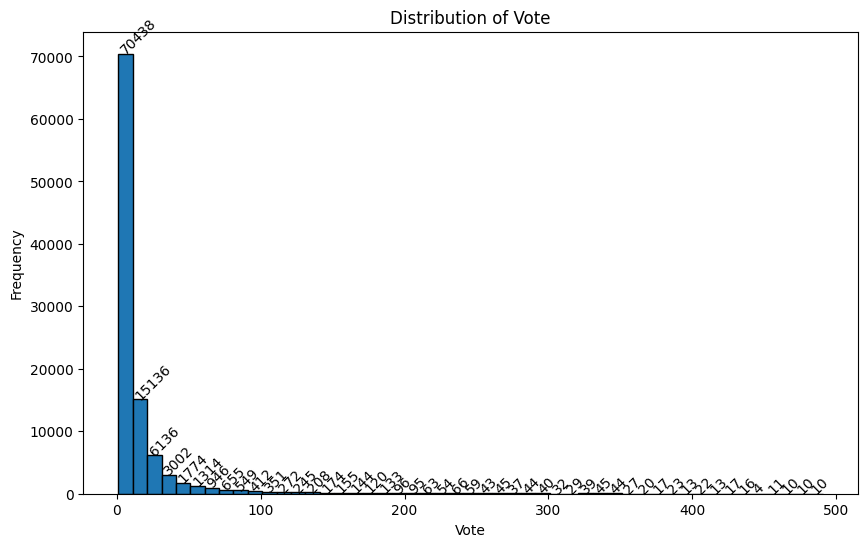

In [ ]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df_image_true['vote'],bins=range(1, 500, 10), edgecolor='black')

for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), rotation=45)

# Set the labels and title
plt.xlabel('Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Vote')

# Show the plot
plt.show()

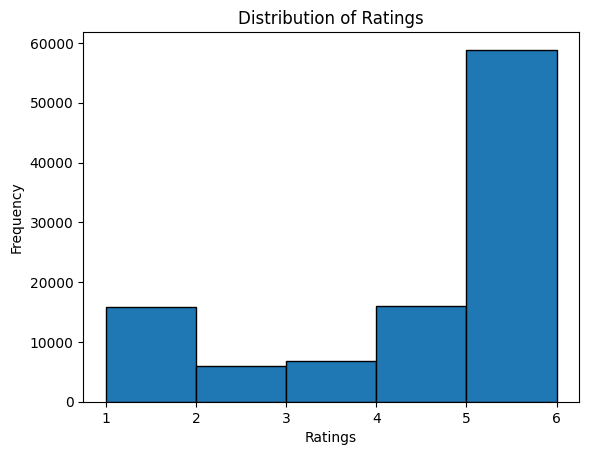

In [ ]:
plt.hist(df_image_true['overall'], bins=range(1, 7), edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

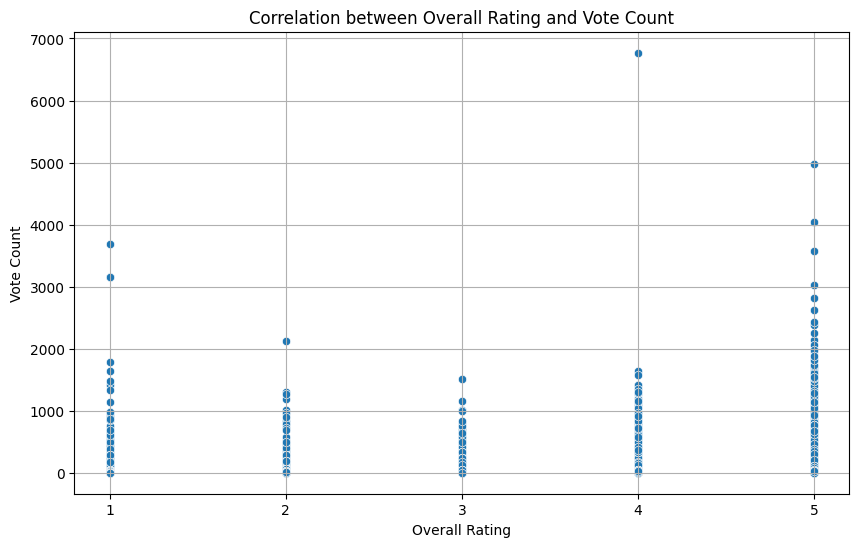

0.01474654730582192

In [ ]:
correlation = df_image_true['overall'].corr(df_image_true['vote'])

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.xticks([1, 2, 3, 4, 5])
sns.scatterplot(x='overall', y='vote', data=df_image_true)
plt.title('Correlation between Overall Rating and Vote Count')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

correlation

In [ ]:
m, b = np.polyfit(df_image_true['overall'], df_image_true['vote'], 1)
m

0.7500423132425983

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


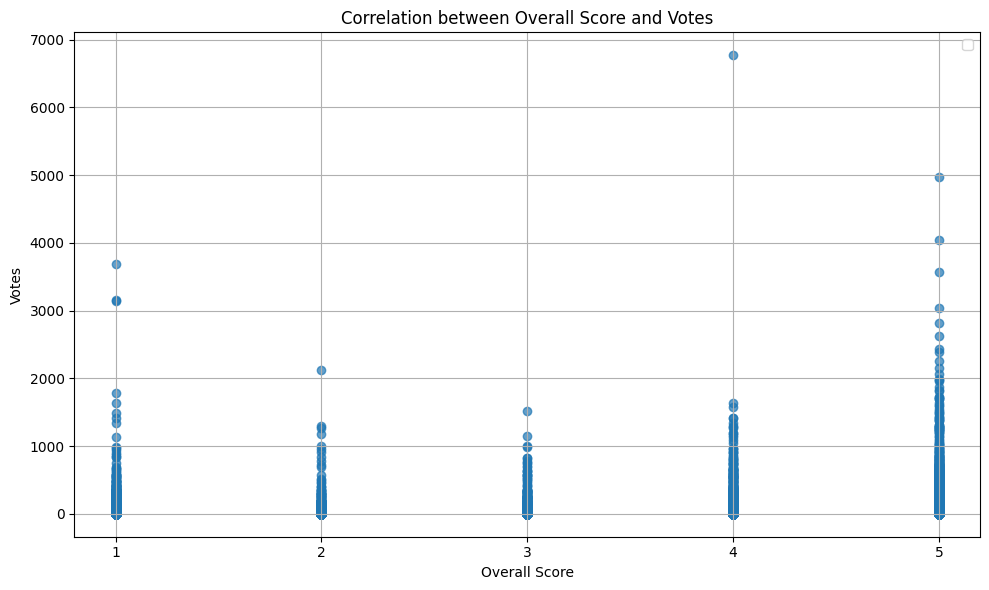

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.xticks([1, 2, 3, 4, 5])
plt.scatter(df_image_true['overall'], df_image_true['vote'], alpha=0.7)

plt.title('Correlation between Overall Score and Votes')
plt.xlabel('Overall Score')
plt.ylabel('Votes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_image_true['vote'].value_counts()

vote
2.0       19119
3.0       13387
4.0        9744
5.0        7475
6.0        5909
          ...  
544.0         1
731.0         1
493.0         1
392.0         1
1542.0        1
Name: count, Length: 749, dtype: int64

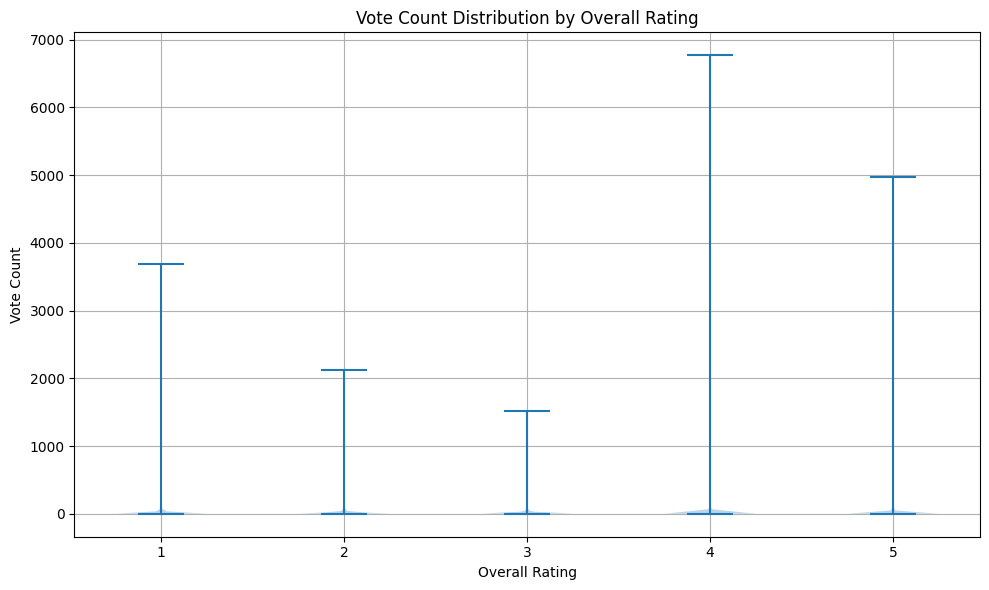

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
plt.violinplot([df_image_true.loc[df_image_true['overall'] == i, 'vote'] for i in range(1, 6)], positions=[1, 2, 3, 4, 5])
plt.title('Vote Count Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
# product的随便搞搞就行了 我们可能就一两张图给到product因为不是重点


In [ ]:
# 而且product description 没分camera 拿大的dataset分一下看看比如camera的总共占全product的多少 
# 算个数就行 plot主要还是展示一些其他的

In [ ]:
# 拿我们选的camera或者phone或者comoputer， 被product dataset leftjoin 过来brand
# 再做个brand 的distribution应该就够了，展示top 几数量的brand